In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

pd.set_option('display.max_columns',None)

In [15]:
df_home=pd.read_csv('/Users/aurelientarroux/Desktop/ML/Data_Challenge_QRT/Data/Train_Data/train_home_team_statistics_df.csv')
df_away=pd.read_csv('/Users/aurelientarroux/Desktop/ML/Data_Challenge_QRT/Data/Train_Data/train_away_team_statistics_df.csv')

df_home.columns='home_'+df_home.columns
df_away.columns='away_'+df_away.columns

df_result=pd.read_csv('/Users/aurelientarroux/Desktop/ML/Data_Challenge_QRT/Data/Y_train_1rknArQ.csv')


In [16]:
base_match=pd.merge(df_home,df_away,left_on="home_ID",right_on='away_ID',how='inner')
base=pd.merge(base_match,df_result,left_on="home_ID",right_on='ID',how='inner')
base=base.drop(['home_ID','home_LEAGUE','home_TEAM_NAME','away_ID','away_LEAGUE','away_TEAM_NAME'],axis=1)


In [17]:
def resultat(row):
    if row['HOME_WINS']==1:
        return 'HOME'
    elif row['AWAY_WINS']==1:
        return 'AWAY'
    else:
        return 'DRAW'

base['Resultat']=base.apply(resultat, axis=1)
print(resultat(base.iloc[0]))
base=base.drop(['HOME_WINS','AWAY_WINS','DRAW'],axis=1)



AWAY


In [18]:
base.dropna(inplace=True)

In [19]:
X = base.drop(['Resultat','ID'],axis=1)
y = base['Resultat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Centre et réduit mes données
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#J'entraine mon modèle
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)  # 'ovr' pour One-vs-Rest, le paramètre par défaut
model.fit(X_train, y_train)

#Je prédis
y_pred = model.predict(X_test)

#Je regarde les résultat
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(classification_report(y_test, y_pred)) 
print(confusion_matrix(y_test, y_pred))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


0.4960677555958863
              precision    recall  f1-score   support

        AWAY       0.49      0.47      0.48       520
        DRAW       0.30      0.14      0.19       416
        HOME       0.54      0.72      0.62       717

    accuracy                           0.50      1653
   macro avg       0.44      0.44      0.43      1653
weighted avg       0.46      0.50      0.47      1653

[[243  70 207]
 [124  58 234]
 [132  66 519]]


In [20]:
#Je ne sais pas torp à quoi ça correspond ?
coefficients=model.coef_
coefficients=pd.DataFrame(coefficients)
coefficients.columns=X.columns

coefficients.applymap(abs)
coefficients=pd.DataFrame(coefficients.sum(axis=0))
coefficients.sort_values(by=0,ascending=False)

/var/folders/lb/whddwtw56cx1mvwl0c2c3r7r0000gn/T/ipykernel_47463/334357936.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coefficients.applymap(abs)


,0
away_TEAM_PENALTIES_season_sum,3.297362e-14
away_TEAM_SHOTS_OFF_TARGET_5_last_match_average,3.050338e-14
home_TEAM_BALL_SAFE_5_last_match_average,2.796374e-14
home_TEAM_SHOTS_OUTSIDEBOX_5_last_match_average,2.442491e-14
home_TEAM_GOALS_season_average,2.398082e-14
...,...
away_TEAM_PENALTIES_season_average,-1.981748e-14
home_TEAM_SHOTS_OFF_TARGET_5_last_match_sum,-2.003953e-14
home_TEAM_SAVES_5_last_match_sum,-2.492451e-14
away_TEAM_SHOTS_TOTAL_5_last_match_sum,-3.183565e-14


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


<Axes: ylabel='Count'>

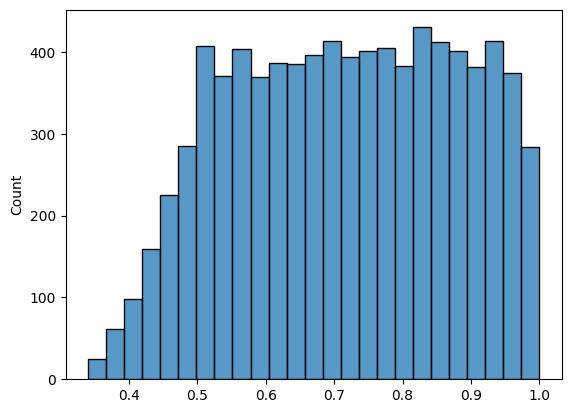

In [21]:
#Proba pour chaque individus d'aprtenir aux classes

proba_list = model.predict_proba(X)
df_proba=pd.DataFrame(proba_list)

sns.histplot(df_proba.max(axis=1))